In [24]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

assert raw_majority_vote(['a', 'b', 'c', 'b']) == 'b'

In [25]:
def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

# Tie, so look at first 4, then 'b'
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

In [26]:
import math
from typing import List

Vector = List[float]

def substract(v: Vector, w: Vector) -> Vector:
    """Substract corresponding element"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))

def distance(v: Vector, w: Vector) -> float:
    return magnitude(substract(v, w))

In [27]:
from typing import NamedTuple

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:

    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp.point, new_point))

    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]

    # and let them vote.
    return majority_vote(k_nearest_labels)

In [ ]:
# import requests

# data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

# with open('iris.csv', 'w') as f:
#     f.write(data.text)

In [46]:
from typing import Dict
import csv
from collections import defaultdict

def parse_iris_row(row: List[str]) -> LabeledPoint:
    """
    sepal_length, sepal_width, petal_length, petal_width, class
    """
    measurements = [float(value) for value in row[:-1]]
    # class is e.g. "Iris-virginica"; we just want "virginica"
    label = row[-1].split("-")[-1]

    return LabeledPoint(measurements, label)

with open('iris.csv') as f:
    reader = csv.reader(f, delimiter=',')
    line_count = 0
    iris_data = []
    for row in reader:
        iris_data.append(row)
    print(f'Proses {line_count} lines.')

Proses 0 lines.


In [47]:
iris_data = iris_data[:-2]

iris_data = [parse_iris_row(row) for row in iris_data]
iris_data

[LabeledPoint(point=[5.1, 3.5, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.9, 3.0, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.7, 3.2, 1.3, 0.2], label='setosa'),
 LabeledPoint(point=[4.6, 3.1, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[5.0, 3.6, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[5.4, 3.9, 1.7, 0.4], label='setosa'),
 LabeledPoint(point=[4.6, 3.4, 1.4, 0.3], label='setosa'),
 LabeledPoint(point=[5.0, 3.4, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[4.4, 2.9, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.9, 3.1, 1.5, 0.1], label='setosa'),
 LabeledPoint(point=[5.4, 3.7, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[4.8, 3.4, 1.6, 0.2], label='setosa'),
 LabeledPoint(point=[4.8, 3.0, 1.4, 0.1], label='setosa'),
 LabeledPoint(point=[4.3, 3.0, 1.1, 0.1], label='setosa'),
 LabeledPoint(point=[5.8, 4.0, 1.2, 0.2], label='setosa'),
 LabeledPoint(point=[5.7, 4.4, 1.5, 0.4], label='setosa'),
 LabeledPoint(point=[5.4, 3.9, 1.3, 0.4], label='setosa'

In [49]:
# We'll also group just the points by species/label so we can plot them.
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

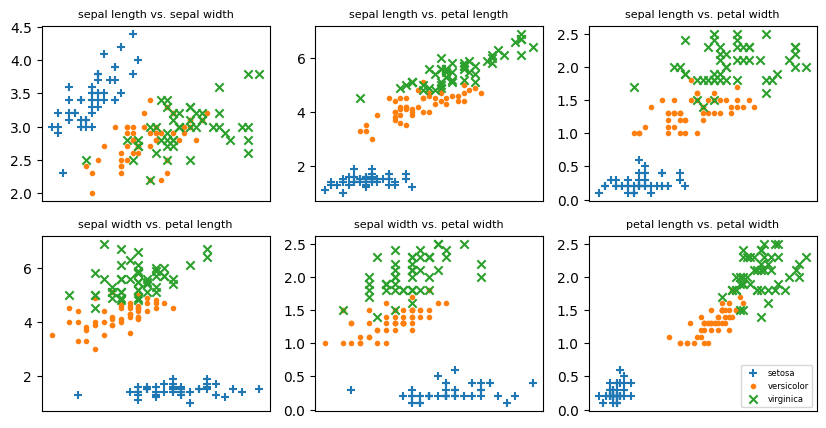

In [50]:
import matplotlib.pyplot as plt
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']
pairs = [(i,j) for i in range(4) for j in range(4) if i < j]
marks = ['+','.','x'] # 3 markers for our 3 classes

fig, ax = plt.subplots(2,3, figsize=(10, 5))

for row in range(2):
    for col in range(3):
        i, j = pairs[3*row + col]
        ax[row][col].set_title(f"{metrics[i]} vs. {metrics[j]}", fontsize = 8)
        ax[row][col].set_xticks([])
        ax[row][col].set_xticks([])

        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs,ys, marker = mark, label = species)

ax[-1][-1].legend(loc = 'lower right', prop = {'size':6})
plt.show()

In [51]:
import random
from typing import TypeVar, List, Tuple
X = TypeVar('X')    # generic type to represent a data point

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split data into fractions [prob, 1 - prob]"""
    data = data[:]                    # Make a shallow copy
    random.shuffle(data)              # because shuffle modifies the list.
    cut = int(len(data) * prob)       # Use prob to find a cutoff
    return data[:cut], data[cut:]     # and split the shuffled list there.

random.seed(12)
iris_train, iris_test = split_data(iris_data, 0.70)

assert len(iris_train) == math.floor(0.7*len(iris_data))
assert len(iris_test) == math.ceil(0.3*len(iris_data))


In [52]:
from typing import Tuple

# track how many times we see (predicted, actual)
confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0
k = 5
for iris in iris_test:
    predicted = knn_classify(k, iris_train, iris.point)
    actual = iris.label

    if predicted == actual:
        num_correct += 1

    confusion_matrix[(predicted, actual)] += 1

pct_correct = num_correct/ len(iris_test)

print(pct_correct, confusion_matrix)

1.0 defaultdict(<class 'int'>, {('versicolor', 'versicolor'): 16, ('setosa', 'setosa'): 13, ('virginica', 'virginica'): 16})


In [53]:
# curse of dimensionality
def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

def random_distance(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

Curse of Dimensionality: 100%|██████████| 100/100 [00:13<00:00,  7.45it/s]


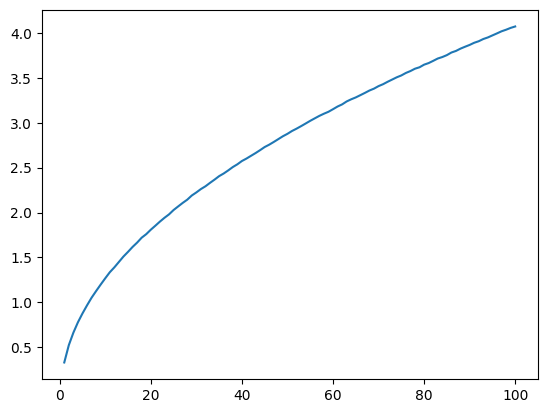

In [54]:
import tqdm
dimensions = range(1,101)
avg_distances = []
min_distances = []
random.seed(0)
for dim in tqdm.tqdm(dimensions, desc = "Curse of Dimensionality"):
    distances = random_distance(dim, 10000) # 10,000 random pairs
    avg_distances.append(sum(distances) / 10000) # track averages
    min_distances.append(min(distances)) # track minimums

plt.plot(dimensions, avg_distances)

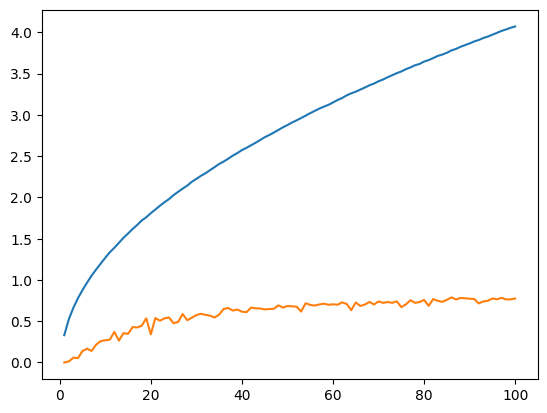

In [ ]:
min_avg_ratio = [min_dist / avg_dist
                for min_dist, avg_dist in zip(min_distances, avg_distances)]
plt.plot(dimensions, avg_distances)
plt.plot(dimensions, min_avg_ratio)

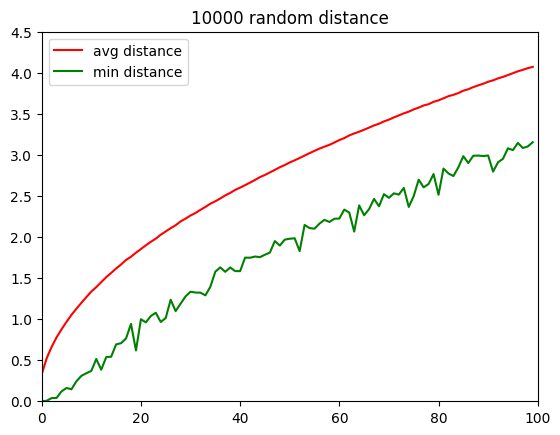

In [57]:
from matplotlib import pyplot as plt

xs=[num for num in range(100)]

plt.plot(xs,avg_distances,"r-",label="avg distance") #平均距離
plt.plot(xs,min_distances,"g-",label="min distance") #最小距離
plt.legend(loc=2)
plt.axis([0,100,0,4.5])
plt.title("10000 random distance")
plt.show()

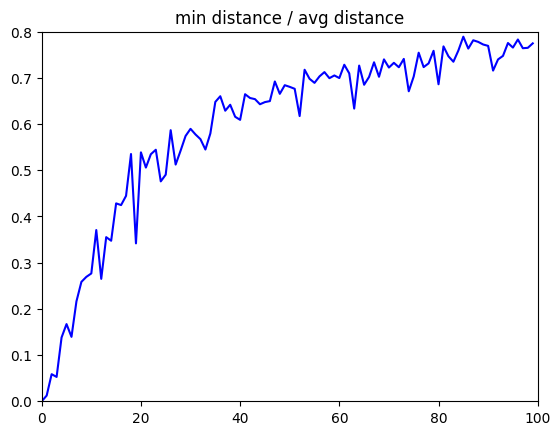

In [58]:
from matplotlib import pyplot as plt

xs=[num for num in range(100)]

plt.plot(xs,min_avg_ratio,"b-")
plt.title("min distance / avg distance")
plt.axis([0,100,0,0.8])
plt.show()

In [60]:
random_distance(1,50)

[0.2243703030601738,
 0.9199372816925093,
 0.7118641396574658,
 0.2568611476274155,
 0.2843691036863242,
 0.31334740942757555,
 0.21316858405146122,
 0.4015051417053801,
 0.4540648672457682,
 0.20678382115380567,
 0.6357675454518072,
 0.3017846764935993,
 0.013221813496248291,
 0.33653779005657214,
 0.40919549194186156,
 0.6874899864382892,
 0.18682979597753968,
 0.1880918344332766,
 0.4931728322786557,
 0.43843475786956687,
 0.208166035177466,
 0.6034012038840499,
 0.6632231641814418,
 0.06230313996075465,
 0.3947945276757483,
 0.5893262963267749,
 0.16874993829925788,
 0.37905973279181426,
 0.5931698117376087,
 0.2022142475083305,
 0.4721363084511643,
 0.32135506292771987,
 0.36662155426566057,
 0.41687358055452406,
 0.06965130659287033,
 0.1939075506596738,
 0.48321209771387197,
 0.375127801022748,
 0.3950761821966602,
 0.6626515812863539,
 0.017895300970062755,
 0.163843381331789,
 0.10922062810226274,
 0.08403864150833984,
 0.43098666278944664,
 0.14107521735218165,
 0.04710304553

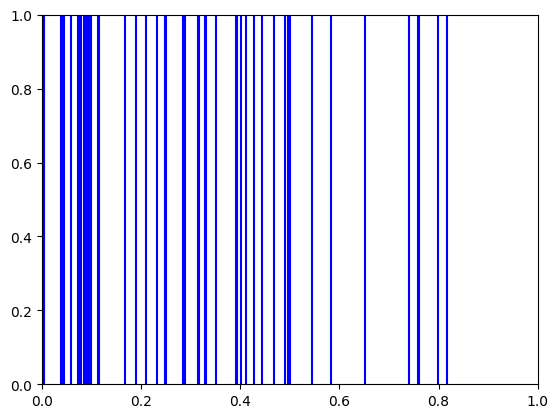

In [62]:
from matplotlib import pyplot as plt

xs=random_distance(1,50)

plt.figure()
plt.axis([0,1,0,1])

plt.hlines(1,1,1)  # Draw a horizontal line
plt.xlim(0,1)
plt.ylim(0,1)
plt.eventplot(xs, orientation='horizontal', colors='b',linelengths=2)
plt.show()

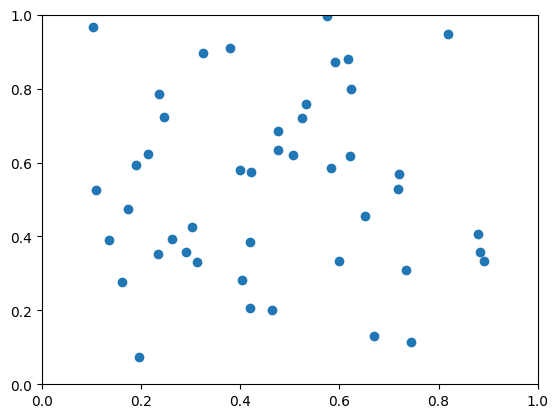

In [64]:
from matplotlib import pyplot as plt

plt.figure()
plt.axis([0,1,0,1])
plt.scatter(random_distance(2,50),random_distance(2,50))
plt.show()

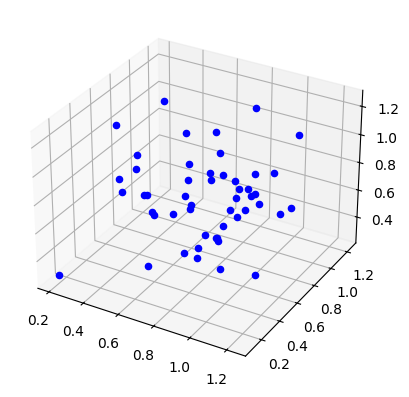

In [65]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #引用三維繪圖的函式庫

#定義三維空間的骨架
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for xs,ys,zs in zip(random_distance(3,50),random_distance(3,50),random_distance(3,50)):
  ax.scatter(xs,ys,zs,c='b',marker="o")

plt.show()